In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings

In [2]:
pd.set_option('display.max_columns', None) #max отображение столбцов
pd.set_option('max_colwidth', 555) #полное отображение записей в датасете
pd.set_option('display.max_colwidth', None) #показывает все символы в строках
warnings.filterwarnings('ignore') #отключим предупреждения

# Домашнее задание

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

## Baseline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
train_X

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
22607,31995,3,-1.0,11636,9.5,-1.0,0,4,4,1997,2000,2,0,11923,160.0,-1.0,0,2,0,1290.0,11642,1415.0,4,2,13,50.0,2000.0,16,3,0,1
36531,51796,8,-1.0,31764,9.0,-1.0,0,4,0,1990,1993,2,1,31915,145.0,-1.0,0,0,4,935.0,31785,1310.0,1,2,13,48.0,1996.0,23,3,0,0
24048,34069,8,-1.0,2773,8.8,6.8,0,4,4,2009,2012,2,1,2258,221.0,-1.0,3,2,4,1373.0,2763,1558.0,4,1,13,56.0,2012.0,10,3,0,1
34819,49346,3,-1.0,52039,14.0,5.3,0,4,5,2015,2017,0,1,51108,198.0,-1.0,0,2,4,1430.0,52081,1590.0,4,2,13,56.0,2017.0,16,3,0,0
1328,1890,3,-1.0,20689,18.0,7.5,0,5,5,2004,2005,0,1,20228,195.0,-1.0,0,2,0,1485.0,20685,1560.0,4,2,13,70.0,2009.0,28,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,8939,6,-1.0,42729,16.5,4.7,0,4,5,2017,0,0,2,44681,230.0,-1.0,0,2,4,1655.0,42742,1630.0,4,2,13,68.0,-1.0,10,3,0,1
11284,16109,0,-1.0,46093,8.1,-1.0,3,7,0,1987,1990,2,0,46106,-1.0,-1.0,0,0,4,-1.0,46131,1486.0,4,2,13,82.0,1996.0,34,3,0,1
38158,54067,3,-1.0,48819,10.0,7.6,0,4,2,2018,0,2,0,48158,202.0,-1.0,0,2,0,1562.0,48858,1636.0,4,2,13,62.0,-1.0,26,3,0,1
860,1217,10,-1.0,9346,22.4,-1.0,0,4,6,1992,1995,0,1,8757,-1.0,-1.0,0,0,3,-1.0,9412,1460.0,1,2,13,50.0,1995.0,16,3,0,1


In [7]:
reg = LinearRegression().fit(train_X, train_y)

In [8]:
reg.score(train_X, train_y)

0.4555406785040048

In [9]:
reg.score(test_X, test_y)

0.4646243987792348

In [10]:
mean_squared_error(reg.predict(train_X), train_y)

np.float64(29840.1212508653)

In [11]:
mean_squared_error(reg.predict(test_X), test_y)

np.float64(31021.0243998545)

In [12]:
df.to_csv('data_lessons_2.csv')

## Описание данных
Датасет содержит технические характеристики различных конфигураций автомобилей, а также целевую переменную (длину колесной базы в миллиметрах)

- **`Unnamed: 0`** – дублирующий индекс
- **`index`** – уникальный индекс строки в исходном датасете
- **`back-suspension`** – тип задней подвески (категориальный признак)
- **`battery-capacity`** – емкость батареи в киловаттах (для электромобилей, `-1` если не применимо)
- **`charge-time`** – время зарядки (если применимо, иначе `-1`)
- **`compression`** – степень сжатия двигателя (если применимо)
- **`consumption-mixed`** – средний расход топлива (литров на 100 км, `-1` если не применимо)
- **`cylinders-order`** – порядок расположения цилиндров в двигателе (категориальный признак)
- **`cylinders-value`** – количество цилиндров в двигателе
- **`engine-feeding`** – тип системы подачи топлива (категориальный признак)
- **`engine-power`** – мощность двигателя в лошадиных силах
- **`engine-size`** – объем двигателя в кубических сантиметрах
- **`engine-torque`** – крутящий момент двигателя
- **`front-suspension`** – тип передней подвески (категориальный признак)
- **`gearbox`** – тип коробки передач (категориальный признак)
- **`gears-value`** – количество передач
- **`models_body-type`** – тип кузова автомобиля (категориальный признак)
- **`models_doors`** – количество дверей
- **`models_drive`** – тип привода (категориальный признак)
- **`models_length`** – длина автомобиля в миллиметрах
- **`models_weight`** – вес автомобиля в килограммах
- **`models_width`** – ширина автомобиля в миллиметрах
- **`models_year`** – год выпуска модели
- **`configurations_back-brake`** – тип заднего тормоза (категориальный признак)
- **`configurations_front-brake`** – тип переднего тормоза (категориальный признак)
- **`configurations_safety-rating`** – уровень безопасности автомобиля (категориальный признак)
- **`configurations_seats`** – количество мест в автомобиле
- **`configurations_tank-volume`** – объем топливного бака (литры)
- **`supergen_year-stop`** – год снятия модели с производства
- **`models_country-from`** – страна происхождения бренда (категориальный признак)
- **`models_group`** – группа моделей автомобиля (категориальный признак)
- **`models_light-and-commercial`** – флаг, обозначающий легковой или коммерческий автомобиль (`0` или `1`)
- **`models_male`** – флаг, обозначающий "мужской" автомобиль (`0` или `1`)
- **`target`** – целевая переменная, длина колесной базы конфигурации в миллиметрах

## Цель
Необходимо предсказать **`target`** (длину колесной базы) на основе остальных характеристик с минимальным MSE

### Изначальный анализ

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [14]:
df.duplicated().sum()

np.int64(0)

<div class="alert alert-info">
Пропущенных значений нет, с этим всё хорошо <br>
Данные в хорошем виде, изменять их тип не нужно <br>
Дубликатов тоже нет
</div>

### Обработка отрицательных значений

In [15]:
negative_values = (df == -1).sum()
print('Значения "-1" в данных:\n', negative_values[negative_values > 0])

Значения "-1" в данных:
 battery-capacity                  43093
compression                        9320
consumption-mixed                 17271
max-speed                         14885
power-electro-kw                  43032
weight                             9399
configurations_back-wheel-base     3067
configurations_tank-volume         5408
supergen_year-stop                 4576
dtype: int64


**Обработаем эти значения**

<div class="alert alert-info">
    
Категориальные признаки (`battery-capacity`, `power-electro-kw`). Значение `-1` означает, что признак не применим (например, у бензиновых авто нет емкости батареи). Заменим `-1` на `0`, чтобы явно обозначить "нет значения"

Числовые признаки (`compression`, `consumption-mixed`, `max-speed`, `weight`, `configurations_tank-volume`, `configurations_back-wheel-base`, `supergen_year-stop`). Здесь `-1` означает "нет данных", а не отсутствие признака. Заменим `-1` на медиану столбца, чтобы сохранить структуру данных без потери информации

</div>

Категориальный признаки

In [16]:
categorical_replace = ['battery-capacity', 'power-electro-kw']
df[categorical_replace] = df[categorical_replace].replace(-1, 0)

Числовые признаки

In [17]:
numerical_replace = ['compression', 'consumption-mixed', 'max-speed', 
                     'weight', 'configurations_tank-volume', 'supergen_year-stop', 
                     'configurations_back-wheel-base']

for col in numerical_replace:
    median_value = df[col].median()
    df[col] = df[col].replace(-1, median_value)

In [18]:
negative_values_after = (df == -1).sum()
print('После обработки значений "-1":\n', negative_values_after[negative_values_after > 0])

После обработки значений "-1":
 Series([], dtype: int64)


<div class="alert alert-success">
    
__Отрицательные значения обработаны__

</div>

### Анализ корреляции

<div class="alert alert-info">
    
Посмотрим корреляцию и глянем, что да как. Сначала удалим очевидные корреляционные зависимости между переменными, чтобы избежать мультиколлинеарности, а затем в конце применим регуляризацию, чтобы было наверняка и перепроверить себя

</div>

In [19]:
df.corr()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
index,1.000000,0.003898,-0.001499,-0.005556,0.001485,-0.001429,-0.002258,-0.001537,0.001591,-0.000337,0.000014,-0.001997,-0.001389,-0.002904,-0.001456,0.007507,-0.007180,0.006258,0.002195,0.001359,-0.005759,0.000422,0.004611,-0.004249,0.000466,0.001192,0.002180,-0.006934,0.006834,0.005661,-0.001654,0.002701
back-suspension,0.003898,1.000000,0.008916,-0.193989,-0.022578,-0.190862,-0.119261,-0.160858,0.061687,-0.029760,-0.026592,0.023575,0.004268,-0.188800,-0.113403,-0.003102,-0.033765,0.132197,0.027428,-0.247337,-0.194854,-0.151621,-0.102584,-0.031057,-0.042323,-0.255975,-0.033010,-0.116755,-0.019685,-0.016126,0.043355,-0.159912
battery-capacity,-0.001499,0.008916,1.000000,-0.031318,-0.016136,-0.033060,0.158151,-0.144716,0.065313,0.055671,-0.102486,-0.013853,-0.022943,-0.002332,0.028183,0.406887,-0.020963,0.124769,0.044102,0.030489,-0.003156,0.034714,0.021898,-0.008764,0.006572,-0.010278,0.007193,0.021067,0.002560,-0.001915,0.024055,0.025667
charge-time,-0.005556,-0.193989,-0.031318,1.000000,-0.006555,0.058947,0.107905,0.121424,-0.007057,0.089422,-0.033840,0.025986,0.008855,0.949215,0.115790,-0.022658,0.016368,-0.109030,0.006639,0.104826,0.994027,0.177341,0.080451,-0.012119,-0.023785,0.067778,0.064295,0.207838,-0.027029,-0.048904,-0.030769,0.110034
compression,0.001485,-0.022578,-0.016136,-0.006555,1.000000,-0.155478,-0.140444,-0.092571,0.413249,0.213916,-0.028270,-0.783065,-0.081821,-0.013156,0.003443,-0.004921,0.185373,-0.090482,-0.031838,0.157126,-0.007664,0.143166,0.127268,-0.105029,0.113052,0.057860,0.213086,-0.124465,0.012506,0.033656,-0.008529,0.075466
consumption-mixed,-0.001429,-0.190862,-0.033060,0.058947,-0.155478,1.000000,0.300801,0.373646,-0.067186,0.038045,0.063304,0.208775,-0.051075,0.029263,0.304572,-0.043840,0.086565,-0.095872,-0.048927,0.362850,0.054084,0.228695,0.117661,0.062398,0.043674,0.363093,0.070116,0.010504,-0.034445,0.011263,-0.028456,0.192008
cylinders-order,-0.002258,-0.119261,0.158151,0.107905,-0.140444,0.300801,1.000000,0.720077,-0.074468,-0.052457,0.007639,0.161144,0.054295,0.078044,0.281982,0.070268,-0.045314,0.026420,0.077159,0.414212,0.111240,0.346094,0.033961,0.102481,-0.014392,0.456491,-0.061262,0.232579,-0.023909,-0.011807,0.000143,0.376272
cylinders-value,-0.001537,-0.160858,-0.144716,0.121424,-0.092571,0.373646,0.720077,1.000000,-0.101289,-0.161831,0.084740,0.132648,0.169542,0.077473,0.392871,-0.053317,-0.002668,-0.026653,0.061603,0.489308,0.112786,0.397329,0.033480,0.125640,-0.028327,0.579728,-0.149547,0.217498,-0.044688,-0.014459,-0.017780,0.472177
engine-feeding,0.001591,0.061687,0.065313,-0.007057,0.413249,-0.067186,-0.074468,-0.101289,1.000000,0.232445,0.027275,-0.472376,-0.128977,0.004969,-0.013355,0.007968,0.073064,0.191078,-0.002288,0.062498,-0.004513,0.074372,0.127065,-0.057243,0.076379,0.027122,0.273291,-0.110842,0.012638,0.026376,-0.026445,0.012235
engine-start,-0.000337,-0.029760,0.055671,0.089422,0.213916,0.038045,-0.052457,-0.161831,0.232445,1.000000,-0.383053,-0.195802,-0.306258,0.058362,0.353763,0.062585,0.157331,-0.240955,-0.287556,0.242819,0.091348,0.453071,0.504745,-0.229782,0.065405,-0.025721,0.865428,-0.136376,-0.026436,0.038331,0.028909,0.150944


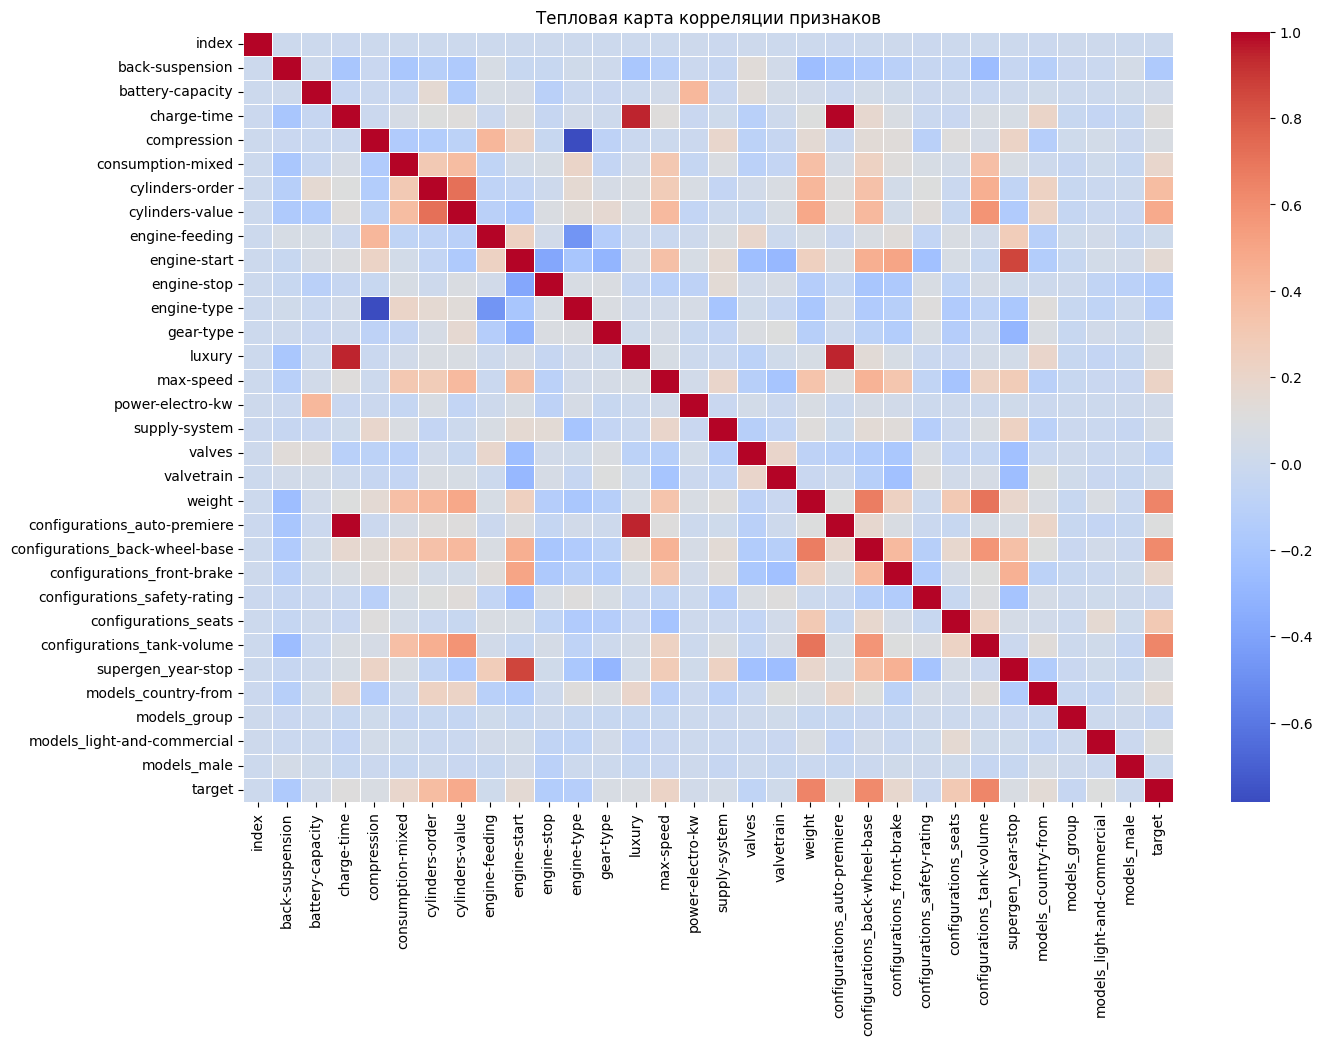

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляции признаков')
plt.show()

<div class="alert alert-block alert-warning">

Объясню удаление некоторых столбцов-переменных

</div>

1. Дублирующие индексы (`Unnamed: 0`, `index`). Это просто идентификаторы строк, не несущие смысловой информации для модели, добавляют только лишний шум. Один из них можно удалить
2. `charge-time`, `luxury`, `configurations_auto-premiere` (взаимосвязь). Оставлять все три признака бессмысленно. Это нарушает принцип независимости признаков: модель будет "переучиваться" на дубликаты, оставляем `configurations_auto-premiere`, так как он наиболее универсален
   * `charge-time` и `configurations_auto-premiere` коррелируют на **0.99** - это почти одно и то же
   * `charge-time` и `luxury` коррелируют на **0.95** - это значит, что одно значение почти предсказывает другое
3. `supergen_year-stop` и `engine-start`. `supergen_year-stop` (год снятия модели с производства) и `engine-start` (особенность двигателя) коррелируют на **0.86**. Скорее всего, эти признаки связаны с развитием технологий (современные модели чаще имеют engine-start): `engine-start` более специфичен и потенциально полезнее - лучше оставить его

In [21]:
drop_columns = ['index', 'charge-time', 'luxury', 'supergen_year-stop']
df = df.drop(columns=drop_columns)

In [22]:
df.head(1)

,back-suspension,battery-capacity,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,0.0,9.0,4.3,0,3,4,2006,2018,2,1,174.0,0.0,0,2,0,820.0,36479,1300.0,1,2,13,40.0,16,3,0,1,2360


In [23]:
df.shape[1]

28

### Отберем наиболее важные признаки

<div class="alert alert-info">
    
Сначала посмотрим на корреляцию признаков с `target` (чтобы оставить те, которые действительно влияют на предсказание)

</div>

In [24]:
correlation_with_target = df.corr()['target'].sort_values(ascending=False)
correlation_with_target

target                            1.000000
weight                            0.638966
configurations_tank-volume        0.636427
configurations_back-wheel-base    0.622740
cylinders-value                   0.472177
cylinders-order                   0.376272
configurations_seats              0.298625
max-speed                         0.214972
consumption-mixed                 0.192008
configurations_front-brake        0.184791
engine-start                      0.150944
models_country-from               0.148848
configurations_auto-premiere      0.106856
models_light-and-commercial       0.102416
compression                       0.075466
gear-type                         0.068319
supply-system                     0.045416
power-electro-kw                  0.028527
battery-capacity                  0.025667
valvetrain                        0.021120
engine-feeding                    0.012235
models_male                       0.003423
configurations_safety-rating     -0.007558
models_grou

<div class="alert alert-block alert-warning">

**Признаки с высокой корреляцией (>|0.3|)**
Эти признаки имеют **существенное влияние** на `target`, поэтому их **оставляем**:
- **`weight` (0.64)** – вес автомобиля имеет сильную зависимость с колесной базой
- **`configurations_tank-volume` (0.64)** – объем топливного бака логично зависит от размеров автомобиля
- **`configurations_back-wheel-base` (0.62)**
- **`cylinders-value` (0.47)** – количество цилиндров влияет на размер двигателя, что может сказываться на колесной базе
- **`cylinders-order` (0.38)** – порядок цилиндров также связан с конструкцией автомобиля

**Признаки со средней корреляцией (0.1 - 0.3)**
Эти признаки **влияют на `target`, но не так сильно**:
- **`configurations_seats` (0.30)** – машины с большей базой могут иметь больше мест
- **`max-speed` (0.21)** – неочевидная связь, но может зависеть от типа автомобиля
- **`consumption-mixed` (0.19)** – чем больше автомобиль, тем выше расход топлива
- **`configurations_front-brake` (0.18)** – конструкция переднего тормоза может быть связана с размерами авто
- **`engine-start` (0.15)** – возможно, современные технологии больше применяются в машинах с разной базой
- **`models_country-from` (0.15)** – страна происхождения бренда может быть связана с размерами автомобилей
- **`configurations_auto-premiere` (0.11)** – признак, относящийся к премиальным моделям
- **`models_light-and-commercial` (0.10)** – легковые и коммерческие автомобили могут различаться по колесной базе

**Признаки с низкой корреляцией (< |0.1|)**
Эти признаки **не оказывают значимого влияния на `target`**, их можно **удалить**:
- **`compression` (0.07)** – степень сжатия двигателя не связана с колесной базой
- **`gear-type` (0.07)**
- **`supply-system` (0.04)** – подача топлива не влияет на длину колесной базы
- **`power-electro-kw` (0.03)**
- **`battery-capacity` (0.03)**
- **`valvetrain` (0.02)** – механизм клапанов не влияет на базу
- **`engine-feeding` (0.01)**
- **`models_male` (0.003)** – почти нулевая зависимость
- **`configurations_safety-rating` (-0.007)** – безопасность не связана с базой
- **`models_group` (-0.03)**
- **`valves` (-0.07)** – количество клапанов не связано с размером авто

**Признаки с отрицательной корреляцией (< -0.1)**
Эти признаки могут **обратным образом влиять** на `target`, но их влияние слабое, **поэтому нужно проанализировать**:
- **`engine-type` (-0.12)** – тип двигателя слабо влияет, но может быть связан с таргетом
- **`engine-stop` (-0.14)** – система "старт-стоп" не связана с колесной базой
- **`back-suspension` (-0.16)** – тип задней подвески не особо связан с `target`

</div>

<div class="alert alert-info">
    
Удалим слабо связанные с таргетом переменные

</div>

In [25]:
drop_low_corr = [
    'compression', 'gear-type', 'supply-system', 'power-electro-kw', 'battery-capacity', 
    'valvetrain', 'engine-feeding', 'models_male', 'configurations_safety-rating', 
    'models_group', 'valves', 'engine-stop', 'back-suspension']

df = df.drop(columns=drop_low_corr)

df.columns

Index(['consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-start', 'engine-type', 'max-speed', 'weight',
       'configurations_auto-premiere', 'configurations_back-wheel-base',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'models_country-from',
       'models_light-and-commercial', 'target'],
      dtype='object')

### Обучение

In [26]:
X = df.drop(columns=['target'])
y = df['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-info">
    
Обучение модели Ridge (L2-регуляризация)

</div>

In [28]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

In [29]:
ridge.score(X_test, y_test)

0.5679566245663707

In [30]:
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_mse

np.float64(24768.506486962193)

<div class="alert alert-info">
    
Обучение модели Lasso (L1-регуляризация)

</div>

In [31]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

In [32]:
lasso.score(X_test, y_test)

0.564381013563043

In [33]:
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_mse

np.float64(24973.49179484219)

<div class="alert alert-danger">
    
Результаты получились такие себе. Скорее всего, присутствуют нелинейные связи. Воспользуемся случайным лесом и, мб, градиентным бустингом и сравним результаты

</div>

<div class="alert alert-info">
    
Обучение RandomForest

</div>

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=55)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [35]:
rf_r2 = r2_score(y_test, rf_preds)
rf_r2

0.9560746376318007

In [36]:
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mse

np.float64(2518.186100335299)

<div class="alert alert-info">
    
Обучение Gradient Boosting

</div>

In [37]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, random_state=55)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

In [38]:
gb_r2 = r2_score(y_test, gb_preds)
gb_r2

0.8141932195993078

In [39]:
gb_mse = mean_squared_error(y_test, gb_preds)
gb_mse

np.float64(10652.070387740709)

<div class="alert alert-warning">
    
Можно поиграть с параметрами у градиентного бустинга, но не хочется, у нас уже есть вполне хороший результат со случайным лесом, основная цель исследования выполнена

</div>

<div class="alert alert-info">
    
Глянем результаты в сравнении со средним и медианным значениями по столбцу 

</div>

In [40]:
df['target'].median()

np.float64(2640.0)

In [41]:
df['target'].mean()

np.float64(2660.826245808764)

In [42]:
df['target'].max()

np.int64(5885)

<div class="alert alert-success">
    
Полученный лучший **MSE** по случайному лесу можно считать вполне хорошим и адекватным, так как ошибка не превышает сам масштаб целевой переменной, что хороший знак. Если бы MSE было намного больше среднего, это означало бы, что модель предсказывает хуже, чем просто среднее значение

**Относительная ошибка** (отношение MSE к среднему = 2518 / 2660.83) ≈ **0.946**. Это означает, что средняя квадратичная ошибка сопоставима с масштабом данных, но не в разы превышает его

Можно, конечно, доработать модель, улучшив гиперпараметры случайного леса, но коэффициент детерминации уже достаточно высокий, дополнительное улучшение может привести к переобучению

</div>

<div class="alert alert-success">
    
## Итоговый вывод по исследованию моделей

| Модель               | `MSE`            | `R²`    |
|----------------------|------------------|-------------|
| **Ridge Regression** | 24 768           | 0.568       |
| **Lasso Regression** | 24 973           | 0.564       |
| **Random Forest**    | **2 518**        | **0.956**   |
| **Gradient Boosting**| 10 652           | 0.814       |

- **Линейные модели (Ridge, Lasso)** показали **слабые результаты** (`R² ≈ 0.56`, `MSE ≈ 24 900`)
- **Gradient Boosting** работает **лучше**, но **уступает Random Forest** (`R² ≈ 0.81`, `MSE ≈ 10 652`)
- **Лучший результат у `RandomForestRegressor`**:
  * `R² = 0.956`, что объясняет **96% дисперсии** данных
  * `MSE = 2 518` → **минимальная ошибка среди всех моделей**. **Причина такого результата** - хорошо работает с нелинейными зависимостями

</div>